# Data Preprocessing for Student Predictive System
This notebook processes the raw dataset `student-mat.csv` to prepare it for model training. It maps categorical features (e.g., studytime, grades) to numerical values, calculates attendance rate, bins performance labels, generates synthetic feedback, and saves the result as `processed_student_data.csv`.

In [6]:
import pandas as pd
import numpy as np

## Load Dataset
Loads the raw student dataset from `student-mat.csv` and displays the first few rows.

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Map Features
Converts studytime to approximate hours, calculates attendance rate, maps grades to scores (0-100 scale), bins G3 into performance labels, and generates feedback.

In [3]:
# Convert studytime to approximate hours
studytime_map = {1: 1, 2: 3.5, 3: 7.5, 4: 12}
df['study_hours'] = df['studytime'].map(studytime_map)

# Approximate attendance_rate (assuming max absences = 100 for simplicity)
df['attendance_rate'] = 100 - df['absences']

# Map grades to scores (scale 0-20 to 0-100)
df['quiz_score'] = df['G1'] * 5
df['assignment_score'] = df['G2'] * 5
df['exam_score'] = df['G3'] * 5

# Bin G3 into performance_label
bins = [-float('inf'), 10, 15, float('inf')]
labels = ['Poor', 'Average', 'Excellent']
df['performance_label'] = pd.cut(df['G3'], bins=bins, labels=labels, include_lowest=True)

# Generate synthetic feedback based on performance_label
feedback_map = {
    'Poor': "Needs to attend more classes and study regularly.",
    'Average': "Good effort but needs improvement in consistency.",
    'Excellent': "Excellent performance, keep it up!"
}
df['feedback'] = df['performance_label'].map(feedback_map)

## Select and Save Data
Selects required columns and saves the processed dataset.

In [4]:
required_columns = ['attendance_rate', 'assignment_score', 'quiz_score', 'exam_score', 'study_hours', 'feedback', 'performance_label']
df_processed = df[required_columns]
df_processed.to_csv('processed_student_data.csv', index=False)
print("Dataset processed and saved as 'processed_student_data.csv'")

Dataset processed and saved as 'processed_student_data.csv'


## Visualize Performance Labels
Displays a bar plot of the performance label distribution.

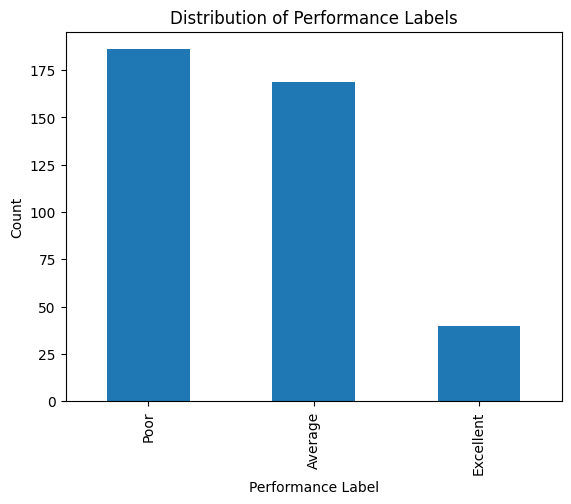

In [5]:
import matplotlib.pyplot as plt
df_processed['performance_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Performance Labels')
plt.xlabel('Performance Label')
plt.ylabel('Count')
plt.show()